<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2022notebooks/2022_0616muler_lyer_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config InlineBackend.figure_format = 'retina'
import torch    
    
try:
    import bit
except ImportError:
    !pip install ipynbname --upgrade > /dev/null 2>&1
    import os
    import shutil
    if os.path.exists('bit'):
        shutil.rmtree('bit')
    !git clone https://github.com/ShinAsakawa/bit.git
import bit
isColab = bit.isColab
HOME = bit.HOME
# 以下を import bit の前に持ってくるとエラーになる
#%matplotlib inline

try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib
    

日付: 2022-07-07
HOSTNAME: Sinope
ユーザ名: _asakawa
HOME: /Users/_asakawa
ファイル名: study/2022komazawa-deep-learning_komazawa-deep-learning.github.io/2022notebooks/2022_0616muler_lyer_test.ipynb
torch.__version__: 1.12.0


In [2]:
import typing
import os
import random
import numpy as np
from glob import glob

import matplotlib.pyplot as plt

import PIL
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [3]:
DEFAULT_CANVAS_WIDTH = 224
DEFAULT_CANVAS_HEIGHT = 224
DEFAULT_LINE_LENGTH = int((DEFAULT_CANVAS_WIDTH >> 2) * 3)
DEFAULT_LINE_WIDTH = 3
DEFAULT_FIN_LENGTH = int((DEFAULT_LINE_LENGTH >> 2))

def make_a_canvas(width:int=DEFAULT_CANVAS_WIDTH,
                  height:int=DEFAULT_CANVAS_HEIGHT,
                  color:tuple=(255,255,255), # 真っ白な (255,255,255) 画像
                  )->PIL.Image.Image:
    '''刺激を描くためのキャンバスを作成して返す'''
    print(f'width:{width}, height:{height}')
    img = Image.new(mode='RGB', 
                    size=(width, height), 
                    color=color)  
    draw = ImageDraw.Draw(img)  # draw オブジェクト ある種のキャンバスを生成
    return img, draw
    
def set_new_canvas(width:int=DEFAULT_CANVAS_WIDTH,
                   height:int=DEFAULT_CANVAS_HEIGHT):
    canvas, draw = make_a_canvas(width=width, height=height)
    return canvas, draw

def draw_a_line_(draw:PIL.ImageDraw.ImageDraw=None,
                 x0:int=0,                         # 主線の開始座標 x
                 y0:int=0,                         # 主線の開始座標 y
                 fin_length=DEFAULT_FIN_LENGTH,    # 矢羽の長さ
                 theta:float=np.pi / 4,            # 矢羽の主線に対する角度，単位ラジアン
                 _length:int=DEFAULT_LINE_LENGTH,  # 主線の長さ
                 _width:int=DEFAULT_LINE_WIDTH,    # 主線の幅
                 _color=None)->PIL.ImageDraw.ImageDraw:  # 主線の色
    '''線分を PIL.Image.Image に書き込む'''

    assert isinstance(draw, PIL.ImageDraw.ImageDraw), 'draw が定義されていません'
    x0_org = x0
    color = (10,10,10) if _color == None else _color
    print(f'x0:{x0} y0:{y0}',
          f'theta:{theta:.3f}',
          f'fin_length:{fin_length}',
          f'line_length:{_length}', 
          f'line_width:{_width} color={color}')
    # 主線の描画
    draw.line(xy=[(x0, y0), (x0 + _length, y0)], width=_width, fill=color)

    # 左矢羽 fin の描画
    x1 = +int(fin_length * np.cos(theta))
    y1 = -int(fin_length * np.sin(theta))
    draw.line(xy=[(x0, y0), (x0 + x1, y0 + y1)], width=_width, fill=color)
    y1 = +int(fin_length * np.sin(theta))
    draw.line(xy=[(x0, y0), (x0 + x1, y0 + y1)], width=_width, fill=color)
    
    # 右矢羽の描画
    x0 += _length
    x1 = +int(fin_length * np.cos(np.pi - theta))
    y1 = -int(fin_length * np.sin(np.pi - theta))
    draw.line(xy=[(x0, y0), (x0 + x1 ,y0 + y1)], width=_width, fill=color)
    y1 = +int(fin_length * np.sin(np.pi - theta))
    draw.line(xy=[(x0, y0), (x0 + x1, y0 + y1)], width=_width, fill=color)
    
    return draw


width:512, height:512
x0:110 y0:100 theta:0.524 fin_length:80 line_length:300 line_width:5 color=(255, 0, 0)
x0:100 y0:200 theta:2.618 fin_length:80 line_length:300 line_width:5 color=(10, 10, 10)


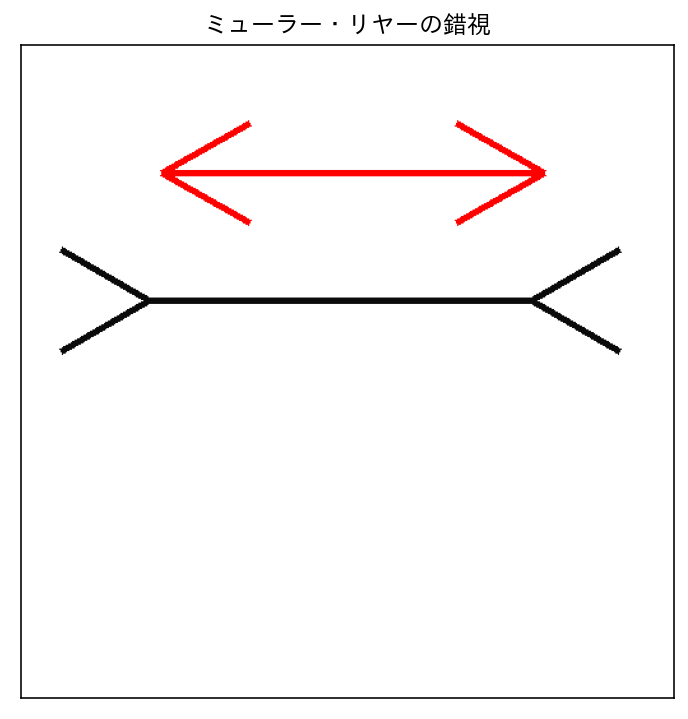

In [8]:
img, draw = make_a_canvas(width=512,height=512)
draw = draw_a_line_(theta=np.pi/6, draw=draw, x0=110, y0=100, _width=5, _length=300, fin_length=80, _color=(255,0,0))
draw = draw_a_line_(draw=draw, x0=100, y0=200, _width=5, _length=300, fin_length=80, theta=np.pi/6*5)
plt.figure(figsize=(6,6))
#plt.ticks('off')
#plt.xticks([])
plt.xticks([]),plt.yticks([])
plt.title('ミューラー・リヤーの錯視')
plt.imshow(img)